![headers_fraud-prev](headers_fraud-prev.jpg)


# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

Note: You can access the data via the File menu or in the Context Panel at the top right of the screen next to Report, under Files. The data dictionary and filenames can be found at the bottom of this workbook.

[Source: Kaggle](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) The data was partially cleaned and adapted by DataCamp.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workbook yours by adding and removing cells, or editing any of the existing cells.

## Explore this dataset

Here are some ideas to get your started with your analysis...
1. 🗺️ **Explore**: What types of purchases are most likely to be instances of fraud? Consider both product category and the amount of the transaction.
2. 📊 **Visualize**: Use a geospatial plot to visualize the fraud rates across different states.
3. 🔎 **Analyze**: Are older customers significantly more likely to be victims of credit card fraud?

### 🔍 **Scenario: Accurately Predict Instances of Credit Card Fraud**

This scenario helps you develop an end-to-end project for your portfolio.

**Background:** A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

**Objective:** The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

You can query the pre-loaded CSV file using SQL directly. Here’s a **sample query**, followed by some sample Python code and outputs:

## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the dataset

In [173]:
-- Exploring the credit_card_fraud.csv table

SELECT 
	* 
FROM 'credit_card_fraud.csv'
LIMIT 5;

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44+00:00,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21 00:00:00+00:00,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51+00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19 00:00:00+00:00,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27+00:00,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21 00:00:00+00:00,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03+00:00,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30 00:00:00+00:00,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32+00:00,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02 00:00:00+00:00,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [174]:
# Missing Values and Descriptive Statistics

credit_card_fraud = pd.read_csv('credit_card_fraud.csv') 

credit_card_fraud.info();
print(credit_card_fraud.describe());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

**There are no missing values in the dataset.**

In [175]:
-- Checking the Available Years of Transactions in the Dataset

SELECT 
	DISTINCT(EXTRACT(YEAR FROM trans_date_trans_time)) AS year
FROM 'credit_card_fraud.csv'
ORDER BY year;

,year
0,2019
1,2020


**The dataset contains transactions for 2 years: 2019 and 2020**

## What types of purchases are most likely to be instances of fraud? 
Consider both product category and the amount of the transaction.

In [176]:

SELECT
	category
	, EXTRACT(YEAR FROM trans_date_trans_time) as year
	, SUM(is_fraud) AS fraud_transactions
	, ROUND(AVG(amt)) AS avg_amt_by_category
	, ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY amt)) AS median_amt_by_category
	, ROUND(SUM(amt)) AS total_sum_amt_by_category
FROM 'credit_card_fraud.csv'
WHERE is_fraud = 1
GROUP BY category
		, EXTRACT(YEAR FROM trans_date_trans_time)
ORDER BY EXTRACT(YEAR FROM trans_date_trans_time)
		,fraud_transactions DESC;

,category,year,fraud_transactions,avg_amt_by_category,median_amt_by_category,total_sum_amt_by_category
0,grocery_pos,2019,250.0,314.0,311.0,78543.0
1,shopping_net,2019,208.0,1006.0,998.0,209240.0
2,misc_net,2019,124.0,793.0,798.0,98326.0
3,shopping_pos,2019,101.0,871.0,849.0,87953.0
4,gas_transport,2019,82.0,12.0,10.0,987.0
5,entertainment,2019,38.0,537.0,536.0,20395.0
6,misc_pos,2019,29.0,99.0,9.0,2860.0
7,kids_pets,2019,28.0,18.0,20.0,502.0
8,personal_care,2019,28.0,27.0,21.0,746.0
9,home,2019,23.0,257.0,243.0,5907.0


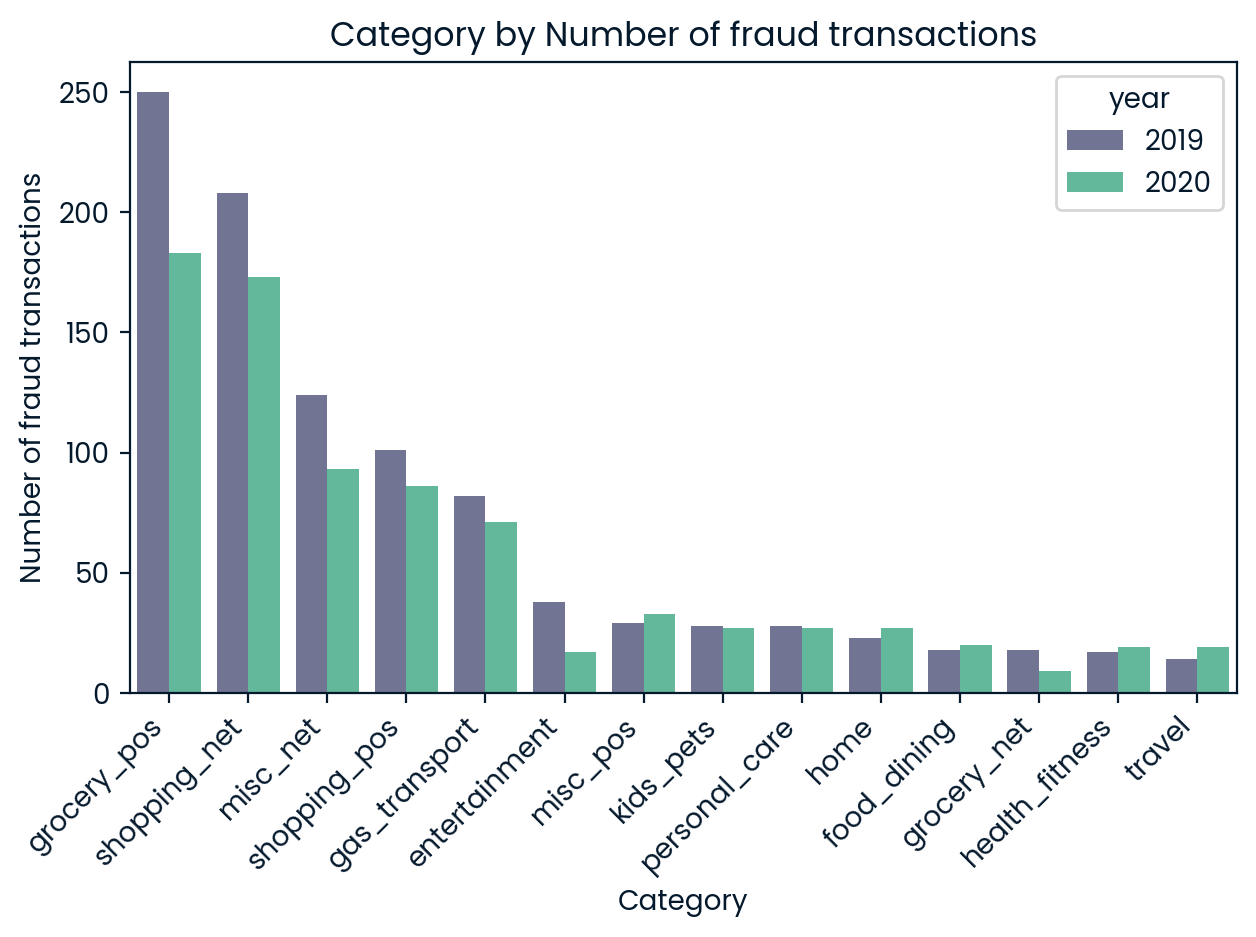

In [177]:
# IMPORTANT! We use the previous query, available under the name year_fraud

sns.barplot(
    data=year_fraud, 
    x='category', 
    y='fraud_transactions',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    }
)

plt.title("Category by Number of fraud transactions")
plt.xlabel("Category")
plt.ylabel("Number of fraud transactions")

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

In [178]:
-- Fraud growth 2020_vs_2019 and amount growth 2020_vs_2019 
	
SELECT
	category
	, ROUND(SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2020 THEN is_fraud END)  / SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2019 THEN is_fraud END), 2) AS fraud_2020_vs_2019
	, ROUND(SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2020 THEN amt END) / SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2019 THEN amt END), 2)AS total_amt_by_category_2020_vs_2019
FROM 'credit_card_fraud.csv'
WHERE is_fraud = 1
GROUP BY category
ORDER BY fraud_2020_vs_2019 DESC;

,category,fraud_2020_vs_2019,total_amt_by_category_2020_vs_2019
0,travel,1.36,1.26
1,home,1.17,1.21
2,misc_pos,1.14,3.77
3,health_fitness,1.12,1.15
4,food_dining,1.11,1.12
5,kids_pets,0.96,1.04
6,personal_care,0.96,1.13
7,gas_transport,0.87,0.96
8,shopping_pos,0.85,0.88
9,shopping_net,0.83,0.82


**Based on these queries, the majority of fraudulent transactions in 2019 and 2020 occur in the top 4 categories:**

    - grocery_pos
    - shopping_net
    - misc_net
    - shopping_pos
We can see that grocery_pos ranks first in terms of the number of fraudulent transactions. At the same time, the second-largest category, shopping_net, has an average transaction amount that is more than three times higher than that of the first category.

According to the data, the number of fraudulent transactions in these four main categories decreased in 2020 compared with 2019.

In [179]:
-- Fraud Transaction Amount Analysis

SELECT 
    is_fraud,
    min(amt) AS min_amount,
    max(amt) AS max_amount,
    avg(amt) AS avg_amount,
    percentile_cont(0.5) WITHIN GROUP (ORDER BY amt) AS median_amount
FROM 'credit_card_fraud.csv'
GROUP BY is_fraud;


,is_fraud,min_amount,max_amount,avg_amount,median_amount
0,1,1.78,1371.81,518.065460,356.435
1,0,1.00,28948.90,68.217523,46.250


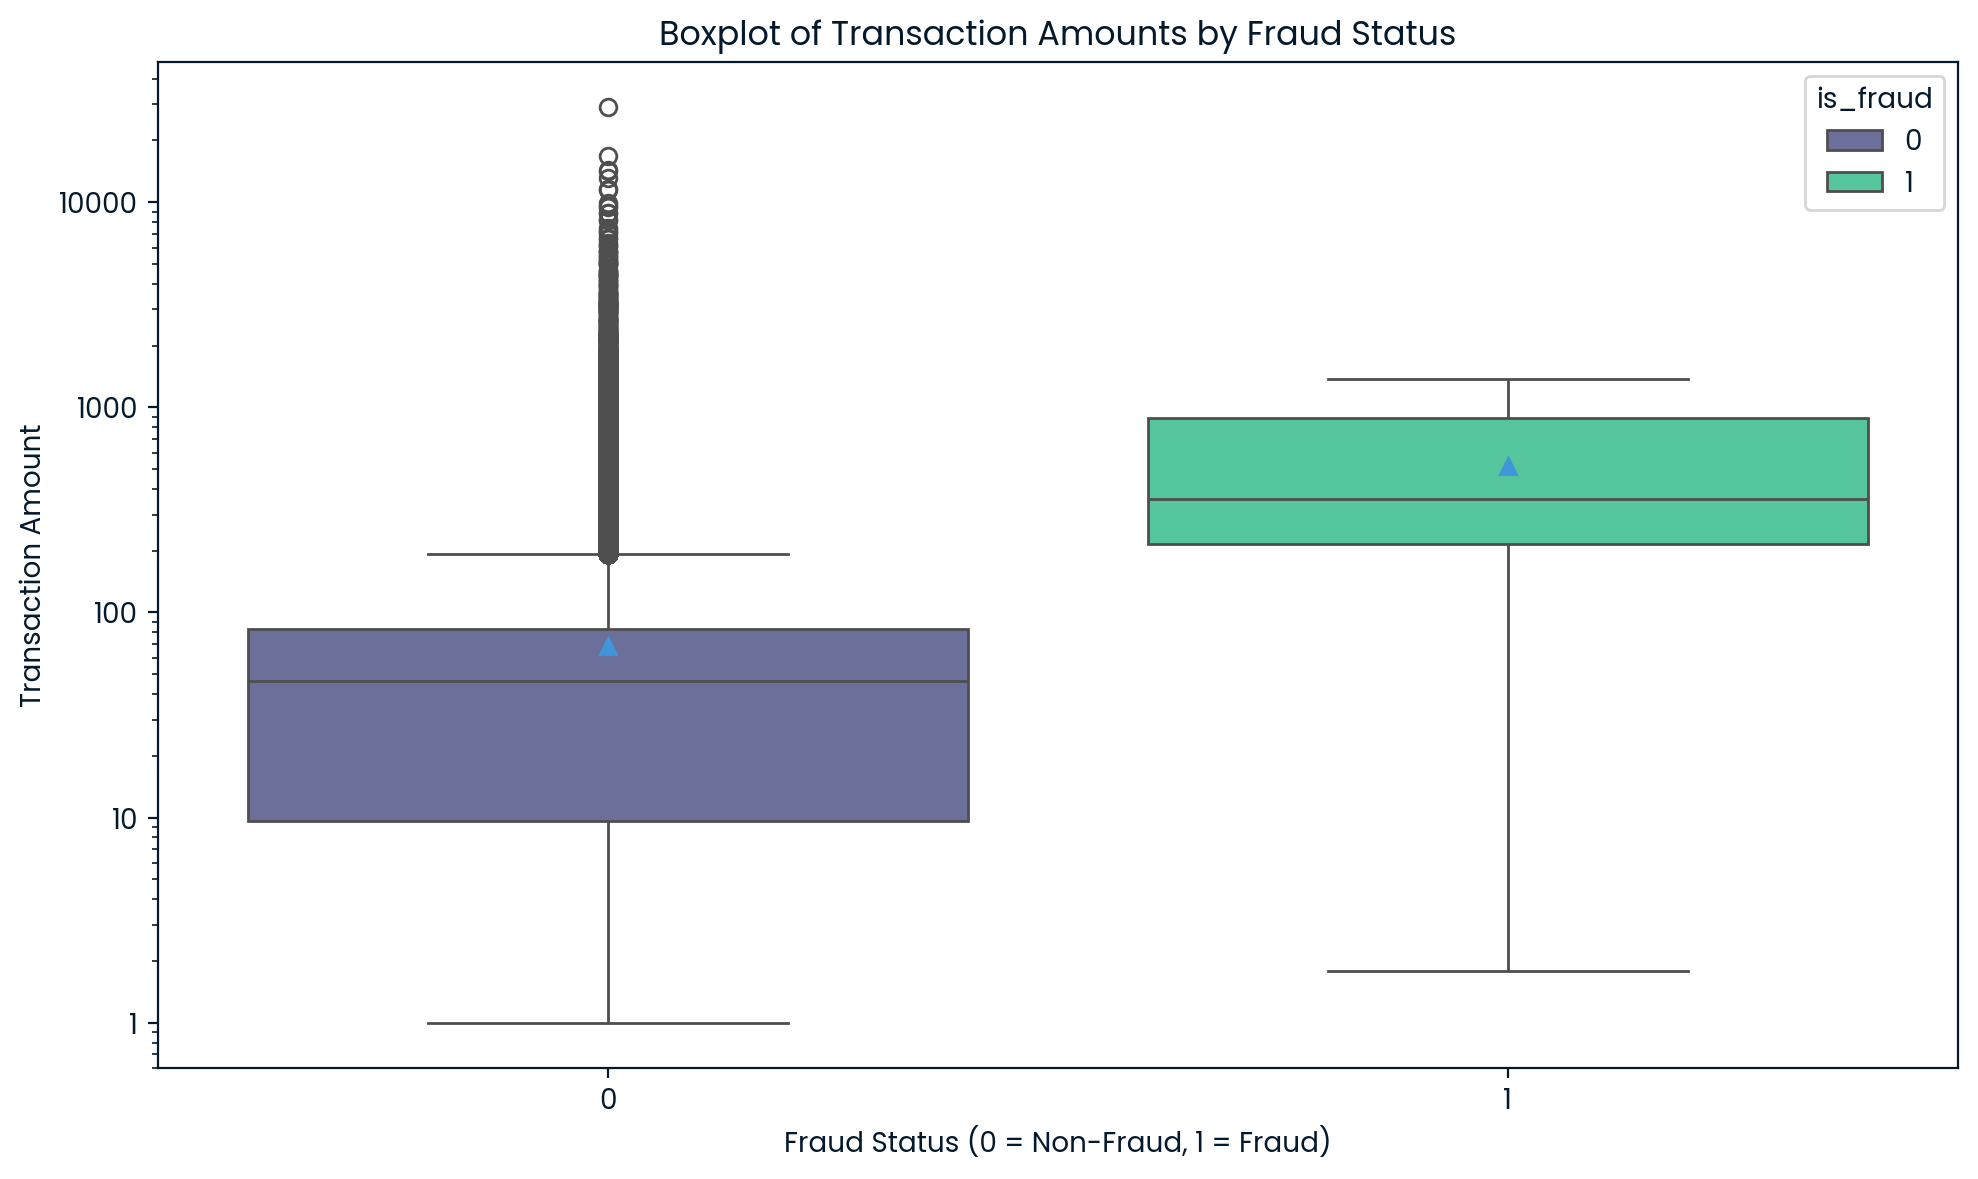

In [180]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(10, 6)) # graph size

sns.boxplot(
    x="is_fraud",   # category: 0 = Non-Fraud, 1 = Fraud
    y="amt",        # transaction amounts
    data=credit_card_fraud, #data
    hue='is_fraud', # color of plot
    showmeans=True  # show average
)

plt.yscale("log")  # Set the Y-axis to a logarithmic scale to better visualize wide-ranging transaction amounts
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # Format the Y-axis tick labels as plain numbers (no scientific notation like 10^1, 10^2)
plt.title("Boxplot of Transaction Amounts by Fraud Status")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.tight_layout() # Adjust the plot layout to make sure all labels, titles, and elements fit nicely within the figure
plt.show()


**Fraud Transaction Amount Analysis**

The analysis of transaction amount distribution reveals substantial differences between fraudulent and non-fraudulent transactions.

The median amount of fraudulent transactions is 356, which is almost 8 times higher than the median amount of all transactions ($46).

The average fraud transaction amount is 518, which is almost 7 times higher than the average transaction amount ($68). 

The maximum fraud transaction amount is approximately $1,371, illustrating a typical fraud range: transactions are large enough to be financially motivated, yet not excessively high to trigger an immediate automatic block by fraud prevention systems.

These findings indicate that fraudulent transactions in this dataset are concentrated in the $300–$1,300 range, making transaction amount an important predictor when building a fraud detection model.

## Use a geospatial plot to visualize the fraud rates across different states.

In [181]:
-- Fraudulent Transaction Counts Across U.S. States 

SELECT
	state
	, sum(is_fraud) as fraud_transactions
FROM 'credit_card_fraud.csv'
GROUP BY state
ORDER BY fraud_transactions DESC

,state,fraud_transactions
0,CA,402.0
1,MO,262.0
2,NE,216.0
3,OR,197.0
4,WA,126.0
5,NM,121.0
6,WY,119.0
7,CO,115.0
8,AZ,64.0
9,UT,61.0


In [182]:
-- Fraud Rate by U.S. State: Fraudulent Transactions as a Proportion of Total Activity

SELECT
    state,
    COUNT(*) AS total_transactions,
    SUM(is_fraud) AS fraud_transactions,
    SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate
FROM 'credit_card_fraud.csv'
GROUP BY state
ORDER BY fraud_rate DESC;

,state,total_transactions,fraud_transactions,fraud_rate
0,AK,2963,50.0,0.016875
1,OR,26408,197.0,0.007460
2,NE,34425,216.0,0.006275
3,CO,19766,115.0,0.005818
4,NM,23427,121.0,0.005165
5,CA,80495,402.0,0.004994
6,MO,54904,262.0,0.004772
7,WA,27040,126.0,0.004660
8,HI,3649,16.0,0.004385
9,WY,27776,119.0,0.004284


In [183]:
# IMPORTANT! We use the previous query, available under the name fraud_rate 

import plotly.express as px

fraud_summary  = fraud_rate;


# Create map 
fig = px.choropleth(
    fraud_summary,
    locations='state',        # State column (must be two-letter state codes, e.g. 'CA', 'NY')
    locationmode='USA-states',
    color='fraud_rate',       # State color by fraud_rate
    hover_name='state',       # US state hint
    hover_data={
        'total_transactions': True,
        'fraud_rate': ':.2%'  # format as percentages
    },
    scope='usa',
    color_continuous_scale='Reds'
)

fig.update_layout(
    title_text='Fraud Rate by U.S. State',
)

fig.show()



**The analysis of fraudulent transactions across U.S. states** shows that the states with the highest number of fraud cases are not necessarily the states with the highest fraud rate.

States such as California, Missouri, and Nebraska report the largest absolute number of fraudulent transactions simply because they have a high overall volume of activity. However, when fraud is considered relative to the total number of transactions, a different pattern emerges.

Alaska stands out with the highest fraud rate, despite having a relatively small total number of transactions. Oregon and Nebraska also show elevated fraud rates compared to other states. This indicates that fraud is more concentrated in certain low-volume states, suggesting potential regional vulnerabilities or targeted fraudulent behavior.

Overall, these findings highlight the importance of analyzing both absolute fraud counts and fraud rates. Looking only at the number of fraudulent transactions can be misleading, while the fraud rate reveals where the risk is truly higher relative to transaction activity.

## Are older customers significantly more likely to be victims of credit card fraud?

In [184]:
-- Calculate the credit card holder's age:

SELECT
	category
	, amt
	, EXTRACT(YEAR FROM age(trans_date_trans_time::date, dob::date)) AS age
	, is_fraud
FROM 'credit_card_fraud.csv';

,category,amt,age,is_fraud
0,grocery_pos,107.23,40,0
1,entertainment,220.11,56,0
2,grocery_pos,96.29,73,0
3,shopping_pos,7.77,51,0
4,misc_pos,6.85,51,0
...,...,...,...,...
339602,home,12.68,81,0
339603,kids_pets,13.02,62,0
339604,health_fitness,43.77,54,0
339605,kids_pets,86.88,39,0


In [185]:
-- IMPORTANT! We use the previous query, available under the name age

SELECT
	is_fraud
	, min(age) AS min_age
	, max(age) AS max_age
	, avg(age) AS average_age
	, percentile_cont(0.5) WITHIN GROUP (ORDER BY age) AS median_age
FROM age
GROUP BY is_fraud;

,is_fraud,min_age,max_age,average_age,median_age
0,1,19,91,50.241863,50.0
1,0,17,93,47.281968,45.0


In [186]:
-- IMPORTANT! We use the previous query, available under the name age

-- Analyze the relationship between customer age and the likelihood that their transaction will be fraudulent.
	
-- The result is sorted in descending order of fraud_rate, which allows us to identify which age groups are most vulnerable to fraud.


SELECT
    CASE
        WHEN age BETWEEN 18 AND 24 THEN '18-24'
        WHEN age BETWEEN 25 AND 34 THEN '25-34'
        WHEN age BETWEEN 35 AND 44 THEN '35-44'
        WHEN age BETWEEN 45 AND 54 THEN '45-54'
        WHEN age BETWEEN 55 AND 64 THEN '55-64'
        ELSE '65+'
    END AS age_group
    , COUNT(*) AS total_transactions --the total number of transactions in this age category;
	, SUM(is_fraud) AS fraud_transactions --the number of fraudulent transactions in this group;
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_age_group --the proportion of fraudulent transactions for each age group;
FROM age
GROUP BY age_group
ORDER BY fraud_rate_by_age_group desc;

,age_group,total_transactions,fraud_transactions,fraud_rate_by_age_group
0,18-24,15918,149.0,0.009360
1,55-64,40034,325.0,0.008118
2,65+,55883,347.0,0.006209
3,45-54,83226,431.0,0.005179
4,25-34,73690,289.0,0.003922
5,35-44,70856,241.0,0.003401


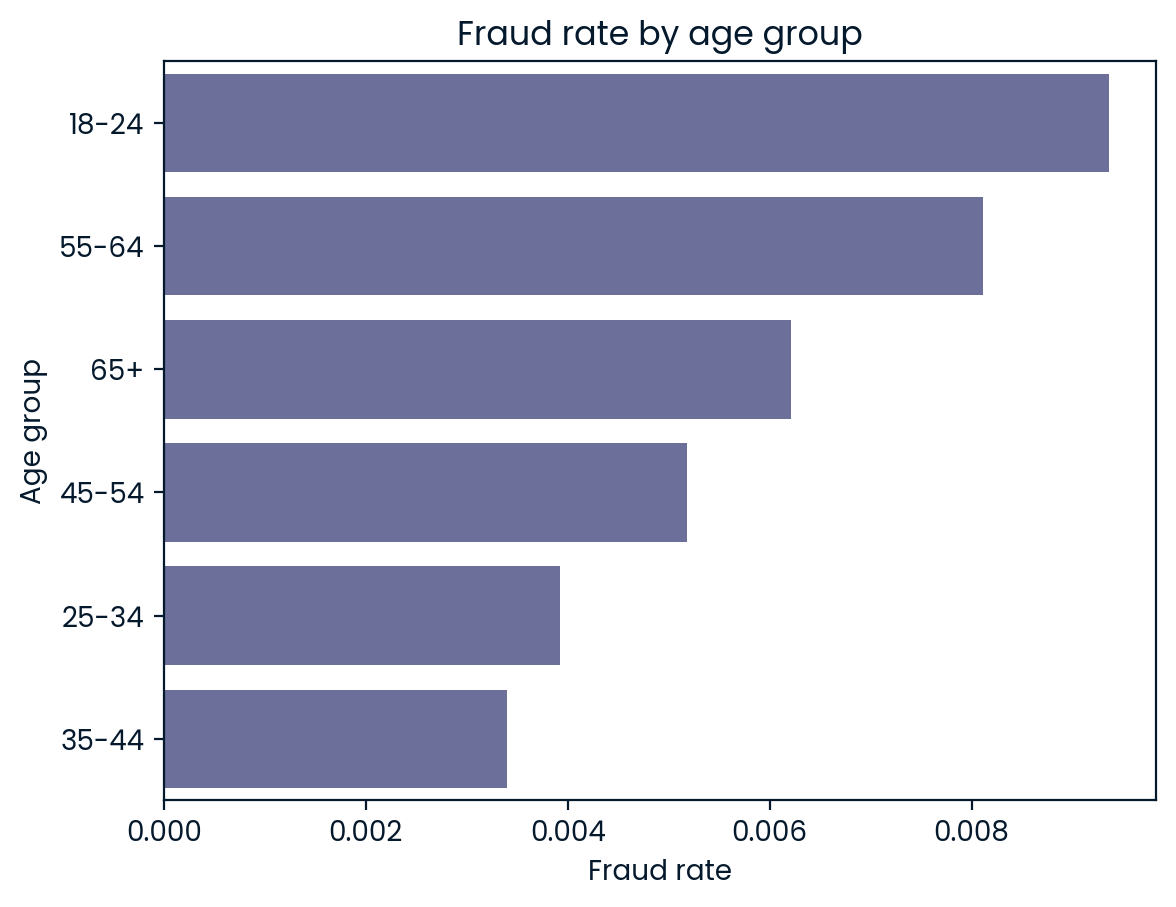

In [187]:
sns.barplot(
    data=age_group, 
    x='fraud_rate_by_age_group', 
    y='age_group'
)

plt.title("Fraud rate by age group")
plt.xlabel("Fraud rate")
plt.ylabel("Age group")


plt.show()

**Are older customers significantly more likely to be victims of credit card fraud?**

Data does not support the claim that older customers are significantly more likely to be victims of credit card fraud.
Fraud rates remain relatively stable across age groups, with the highest rate observed among the youngest customers (18–24) rather than the oldest (65+).
Thus, age does not appear to be a strong predictor of fraud victimization in this dataset.

## Fraud rate trend by years 2019-2020

In [188]:
-- fraud_trend_by_year

SELECT
	CONCAT(EXTRACT(year FROM trans_date_trans_time), '-', printf('%02d', EXTRACT(month FROM trans_date_trans_time))) AS year_month
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_month
FROM 'credit_card_fraud.csv'
GROUP BY year_month
ORDER BY year_month;

,year_month,total_transactions,fraud_transactions,fraud_rate_by_month
0,2019-01,9694,99.0,0.010213
1,2019-02,9084,88.0,0.009687
2,2019-03,13098,130.0,0.009925
3,2019-04,12495,53.0,0.004242
4,2019-05,13412,86.0,0.006412
5,2019-06,15773,23.0,0.001458
6,2019-07,15779,65.0,0.004119
7,2019-08,16169,82.0,0.005071
8,2019-09,13147,128.0,0.009736
9,2019-10,12528,74.0,0.005907


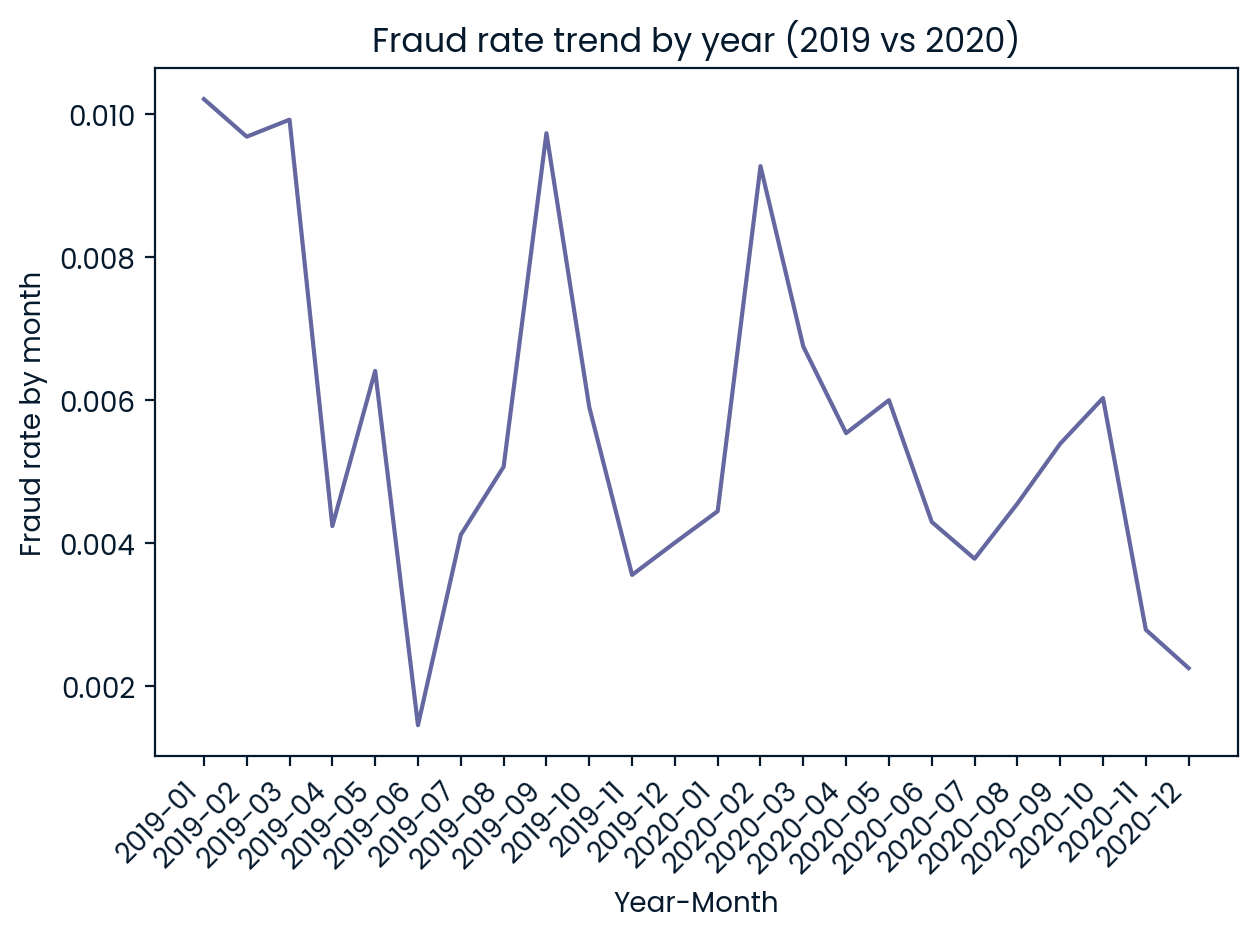

In [189]:
# Fraud rate trend by year (2019 vs 2020)

sns.lineplot(
    data=fraud_trend_by_year,
    x='year_month',
    y='fraud_rate_by_month',
)

plt.title("Fraud rate trend by year (2019 vs 2020)")
plt.xlabel("Year-Month")
plt.ylabel("Fraud rate by month")

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()


## Fraud by month

In [190]:
--By month 

SELECT
	EXTRACT(year from trans_date_trans_time) as year
	, EXTRACT(month from trans_date_trans_time) as month
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_month
FROM 'credit_card_fraud.csv'
GROUP BY  year, month
ORDER BY year, fraud_rate_by_month DESC;

,year,month,total_transactions,fraud_transactions,fraud_rate_by_month
0,2019,1,9694,99.0,0.010213
1,2019,3,13098,130.0,0.009925
2,2019,9,13147,128.0,0.009736
3,2019,2,9084,88.0,0.009687
4,2019,5,13412,86.0,0.006412
5,2019,10,12528,74.0,0.005907
6,2019,8,16169,82.0,0.005071
7,2019,4,12495,53.0,0.004242
8,2019,7,15779,65.0,0.004119
9,2019,12,25935,104.0,0.004010


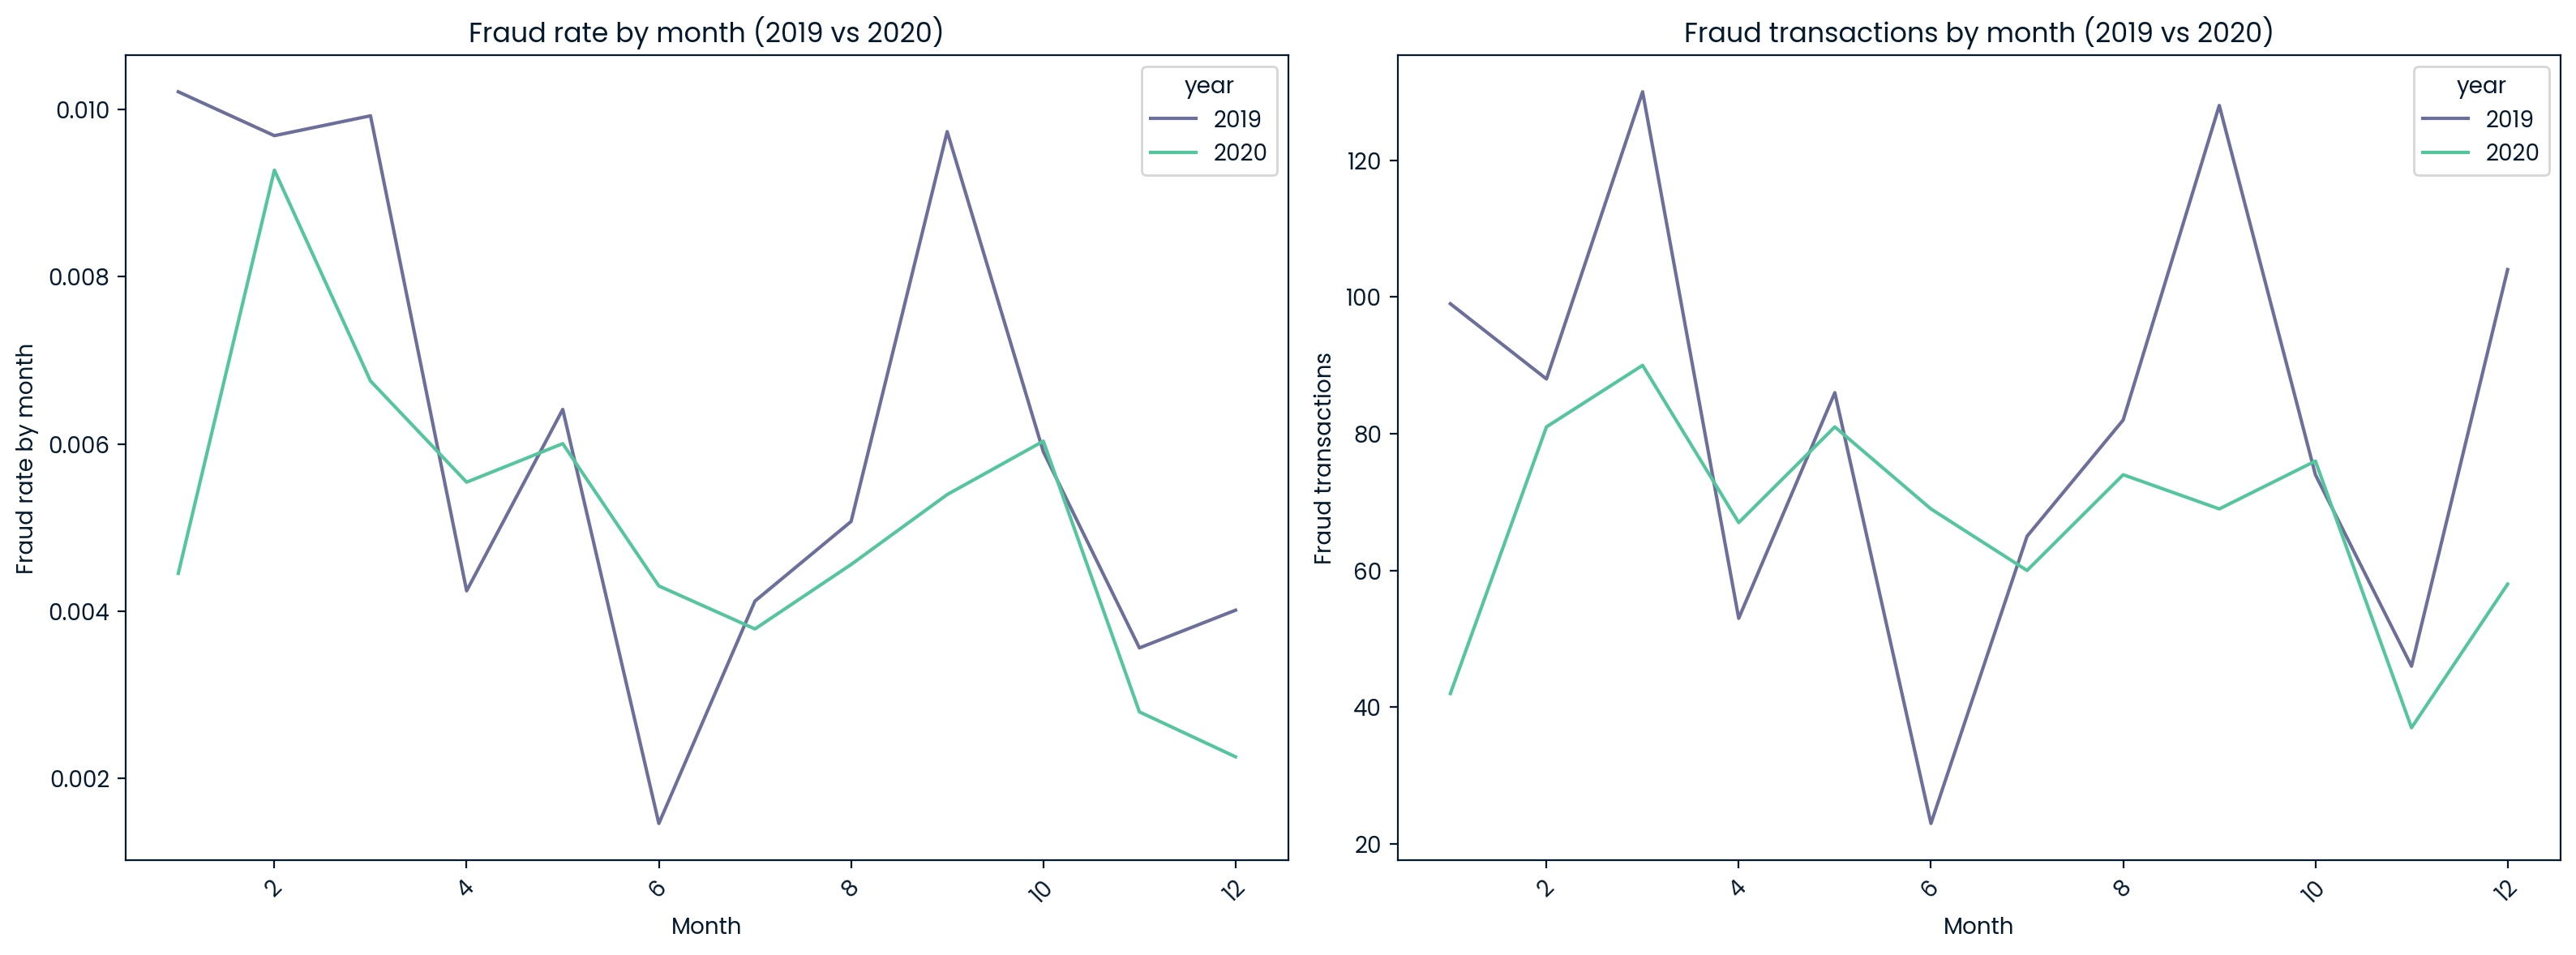

In [191]:
# Создаем фигуру с 1 строкой и 2 колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 16 ширина, 6 высота

# -------------------------------
# График 1: Fraud rate by month
sns.lineplot(
    data=fraud_by_month,
    x='month',
    y='fraud_rate_by_month',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[0]  # первый subplot
)
axes[0].set_title("Fraud rate by month (2019 vs 2020)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Fraud rate by month")
axes[0].tick_params(axis='x', rotation=45)  # если нужно повернуть подписи

# -------------------------------
# График 2: Fraud transactions by day of week
sns.lineplot(
    data=fraud_by_month,
    x='month',
    y='fraud_transactions',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[1]  # второй subplot
)
axes[1].set_title("Fraud transactions by month (2019 vs 2020)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Fraud transactions")
axes[1].tick_params(axis='x', rotation=45)  # если подписи длинные

# -------------------------------
plt.tight_layout()  # чтобы графики не наслаивались
plt.show()


## Fraud by day of week

In [192]:
--by day of week 

SELECT
	EXTRACT(year from trans_date_trans_time) as year
	, dayname(trans_date_trans_time) AS day_of_week
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_dow
FROM 'credit_card_fraud.csv'
GROUP BY  year, day_of_week
ORDER BY year, fraud_rate_by_dow DESC;

,year,day_of_week,total_transactions,fraud_transactions,fraud_rate_by_dow
0,2019,Friday,19984,155.0,0.007756
1,2019,Saturday,27598,189.0,0.006848
2,2019,Monday,33327,210.0,0.006301
3,2019,Tuesday,18376,110.0,0.005986
4,2019,Wednesday,17481,104.0,0.005949
5,2019,Thursday,19822,84.0,0.004238
6,2019,Sunday,33451,126.0,0.003767
7,2020,Thursday,18455,115.0,0.006231
8,2020,Wednesday,16522,94.0,0.005689
9,2020,Friday,19834,109.0,0.005496


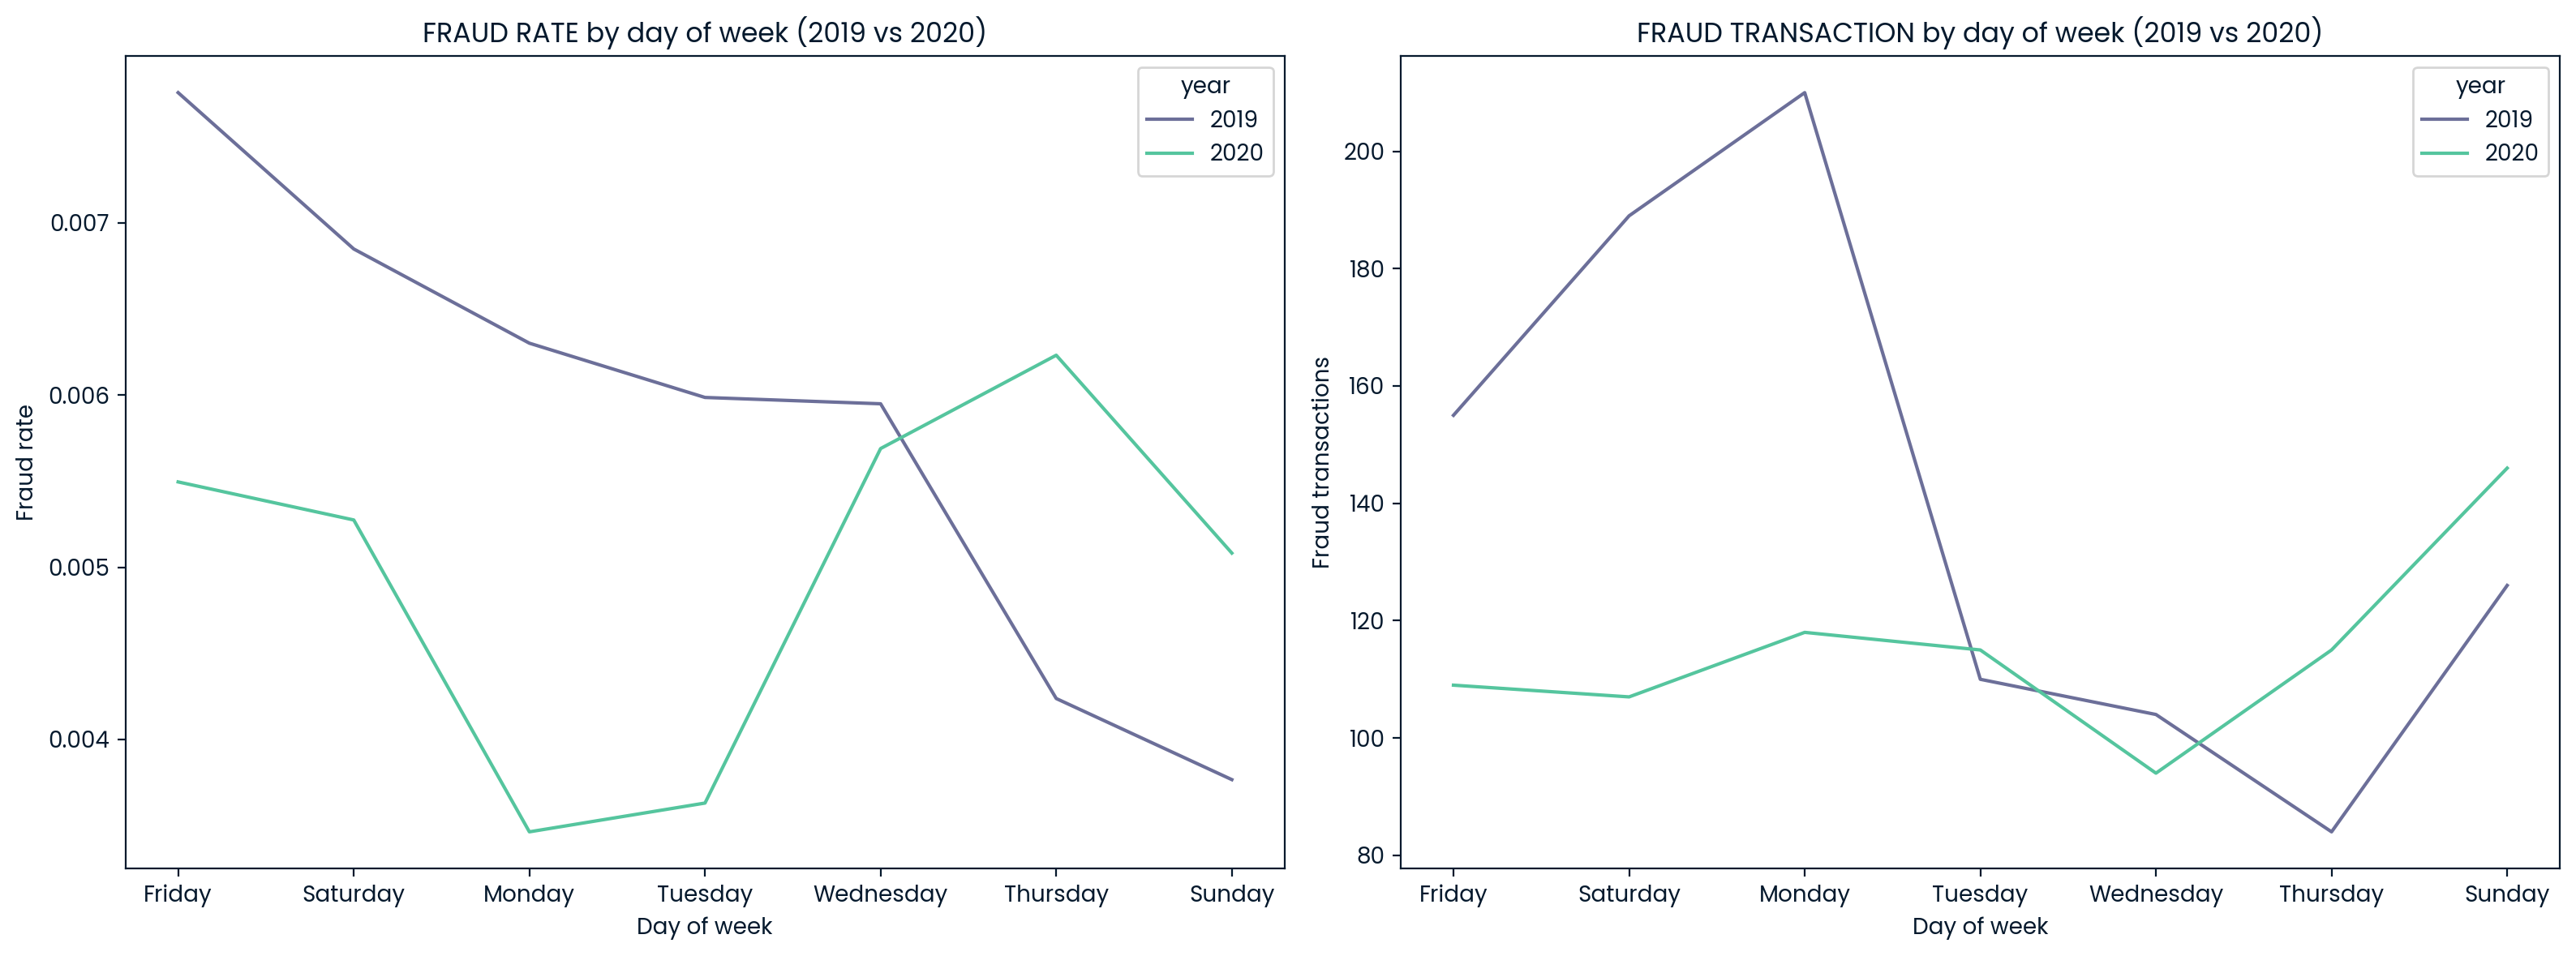

In [193]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(
    data=fraud_by_dayweek,
    x='day_of_week',
    y='fraud_rate_by_dow',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[0]  # first subplot
)
axes[0].set_title("FRAUD RATE by day of week (2019 vs 2020)")
axes[0].set_xlabel("Day of week")
axes[0].set_ylabel("Fraud rate")

sns.lineplot(
    data=fraud_by_dayweek,
    x='day_of_week',
    y='fraud_transactions',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[1]  # second subplot
)
axes[1].set_title("FRAUD TRANSACTION by day of week (2019 vs 2020)")
axes[1].set_xlabel("Day of week")
axes[1].set_ylabel("Fraud transactions")

plt.tight_layout()  # чтобы графики не наслаивались
plt.show()

## Fraud rate by hour 

In [164]:
-- by hour
SELECT
	EXTRACT(hour from trans_date_trans_time) as hour
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_hour
FROM 'credit_card_fraud.csv'
GROUP BY  hour
ORDER BY fraud_rate_by_hour DESC;

,hour,total_transactions,fraud_transactions,fraud_rate_by_hour
0,23,17516,459.0,0.026205
1,22,17460,452.0,0.025888
2,0,11039,168.0,0.015219
3,1,11241,168.0,0.014945
4,3,11227,143.0,0.012737
5,2,11019,140.0,0.012705
6,20,17298,23.0,0.001330
7,16,17465,23.0,0.001317
8,15,17169,22.0,0.001281
9,17,17011,20.0,0.001176


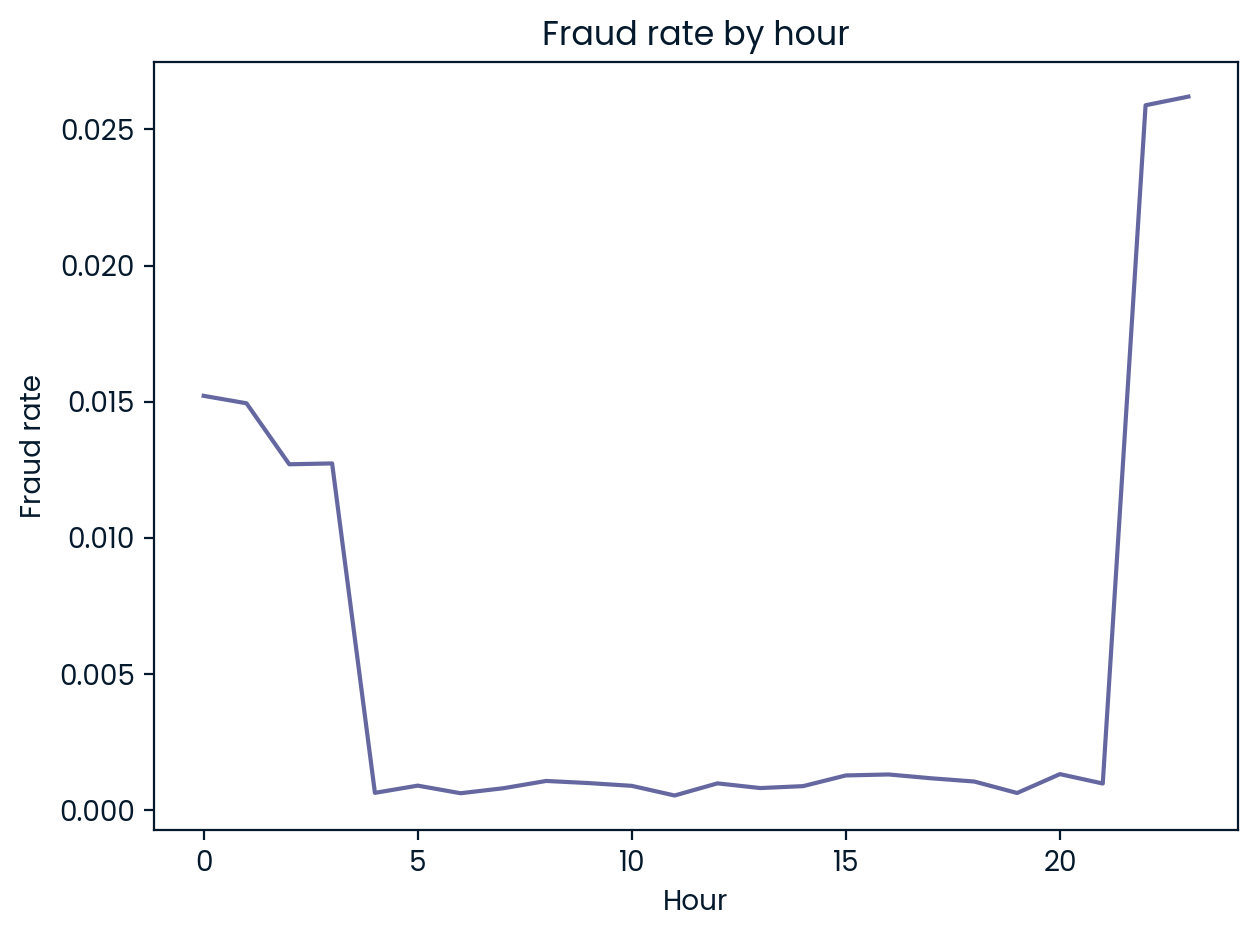

In [167]:
sns.lineplot(
    data=fraud_hour,
    x='hour',
    y='fraud_rate_by_hour',
)
plt.title("Fraud rate by hour")
plt.xlabel("Hour")
plt.ylabel("Fraud rate")

plt.tight_layout() 
plt.show()

In [170]:
--by day_of_week and hour

SELECT
	EXTRACT(hour from trans_date_trans_time) as hour
	, dayname(trans_date_trans_time) AS day_of_week
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_hour
FROM 'credit_card_fraud.csv'
GROUP BY  hour, day_of_week
ORDER BY hour, fraud_rate_by_hour DESC;

,hour,day_of_week,total_transactions,fraud_transactions,fraud_rate_by_hour
0,0,Thursday,1231,31.0,0.025183
1,0,Wednesday,1097,21.0,0.019143
2,0,Saturday,1611,26.0,0.016139
3,0,Monday,2236,33.0,0.014758
4,0,Tuesday,1615,21.0,0.013003
...,...,...,...,...,...
163,23,Wednesday,1761,46.0,0.026122
164,23,Monday,3488,90.0,0.025803
165,23,Thursday,1934,44.0,0.022751
166,23,Sunday,3226,73.0,0.022629


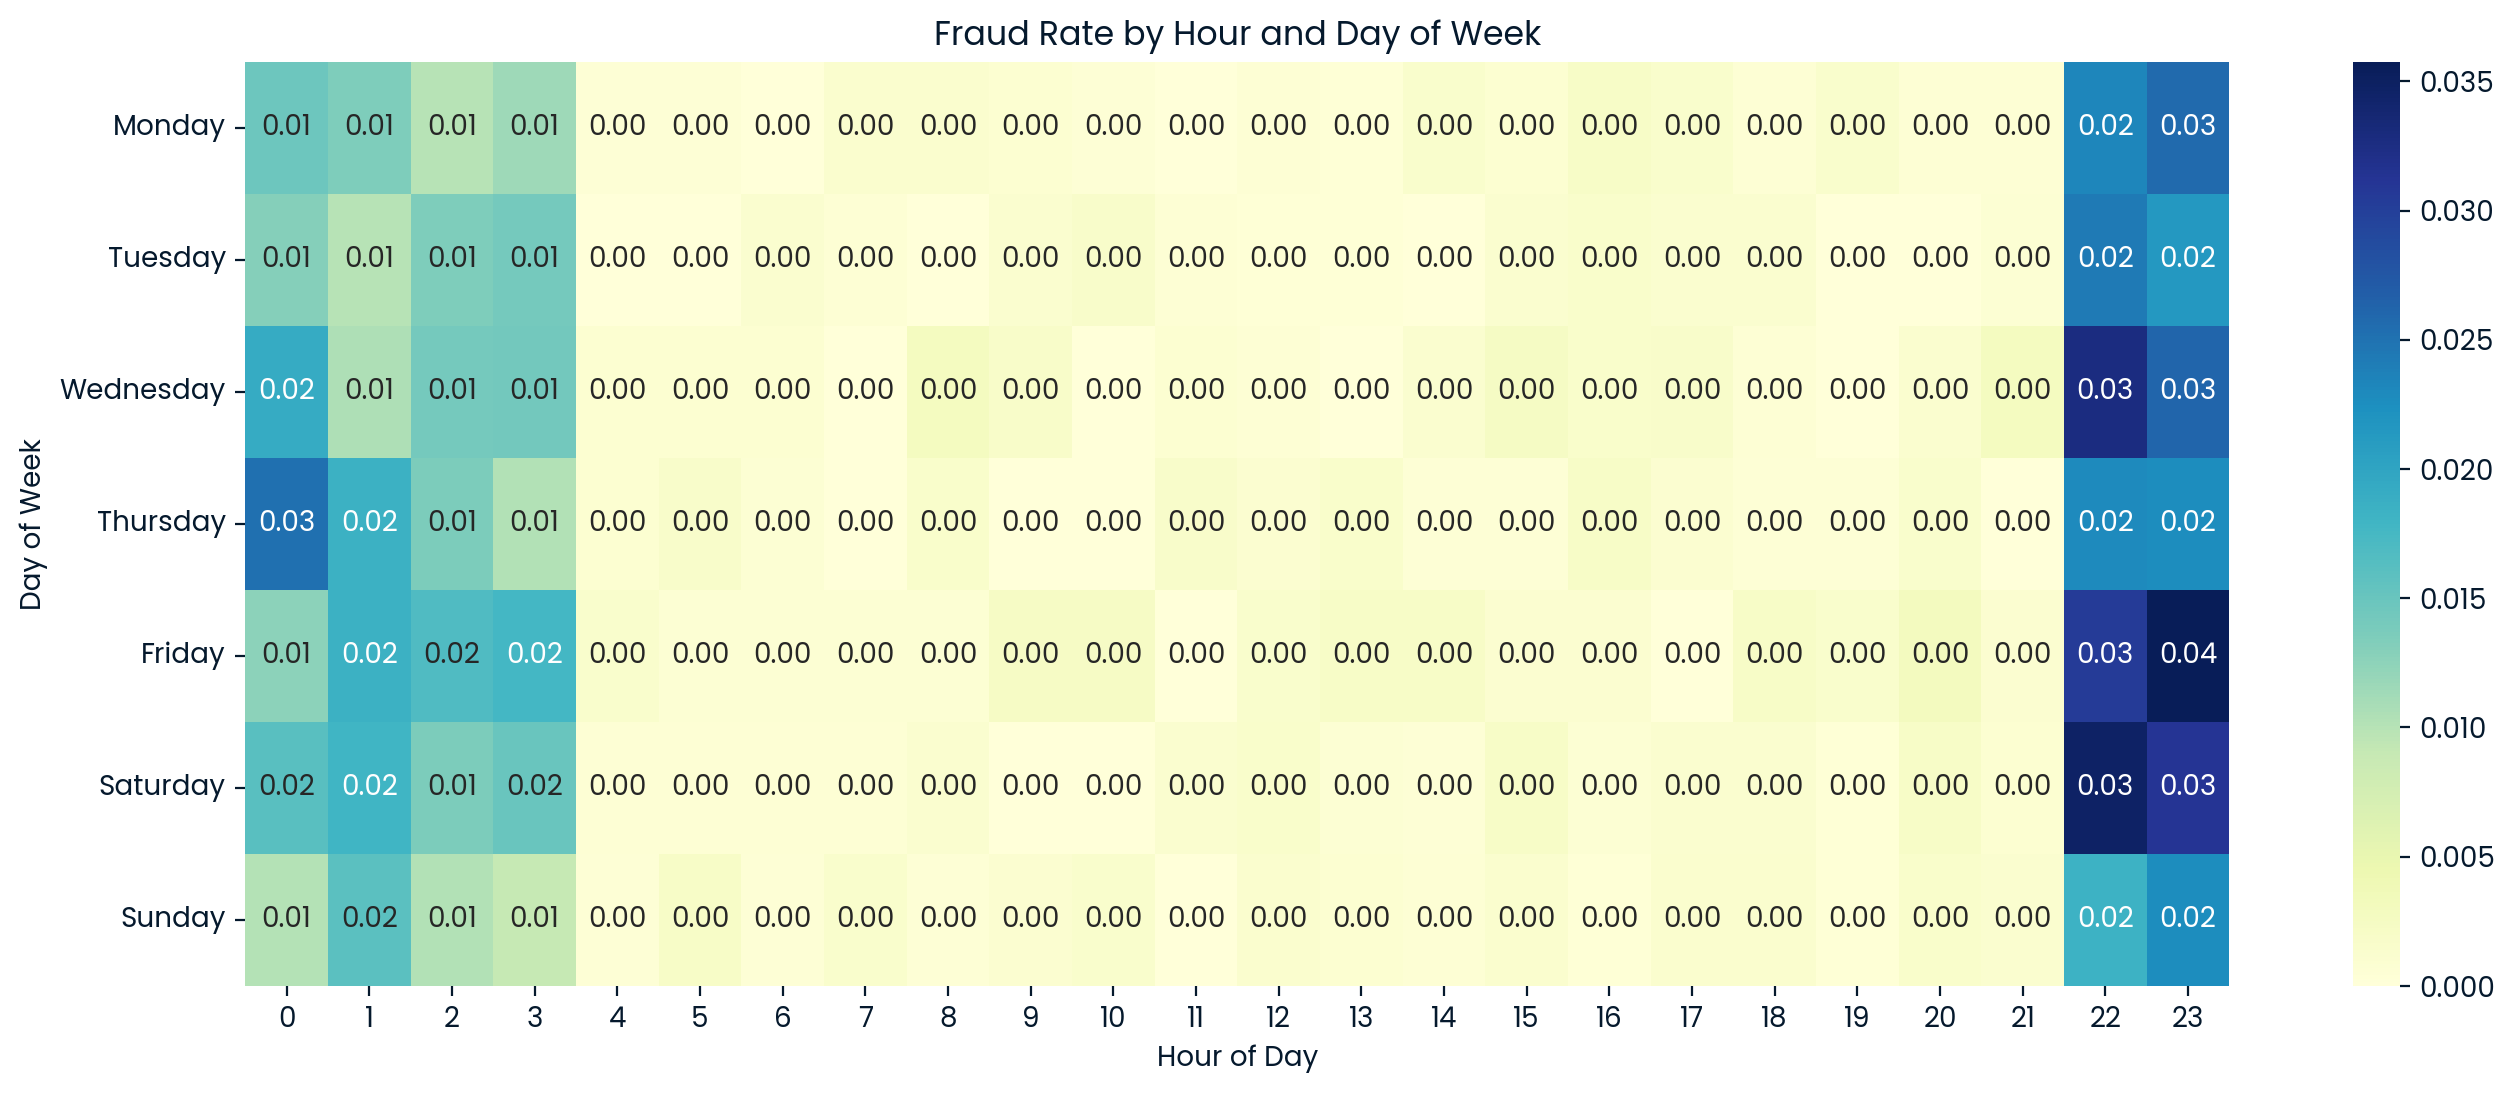

In [171]:
# 1️⃣ Pivot table: дни недели — строки, часы — столбцы
heatmap_data = hour_dayweek.pivot(index='day_of_week', columns='hour', values='fraud_rate_by_hour')

# 2️⃣ Если нужно, сортируем дни недели в порядке: Mon, Tue, ..., Sun
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 3️⃣ Строим heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",  # можно поменять цветовую палитру
    annot=True,     # отображает значения в ячейках
    fmt=".2f"       # формат чисел
)
plt.title("Fraud Rate by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()
